In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
import seaborn as sns

# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
#Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path = os.chdir("/gdrive/MyDrive/FA_Project_New/")
data_df = pd.read_csv('data.csv', encoding='latin')
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


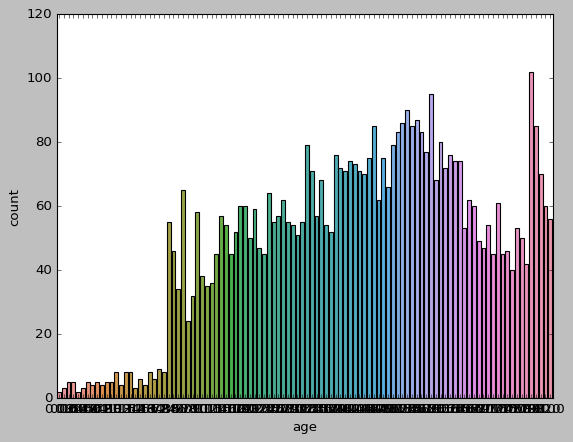

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data_df["age"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


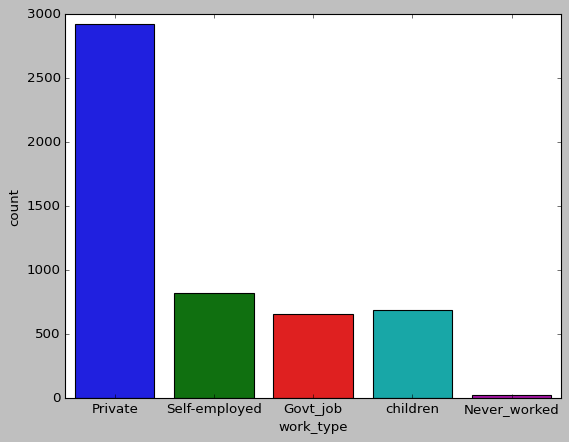

In [6]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data_df["work_type"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution [ μ: 43.23 ]')

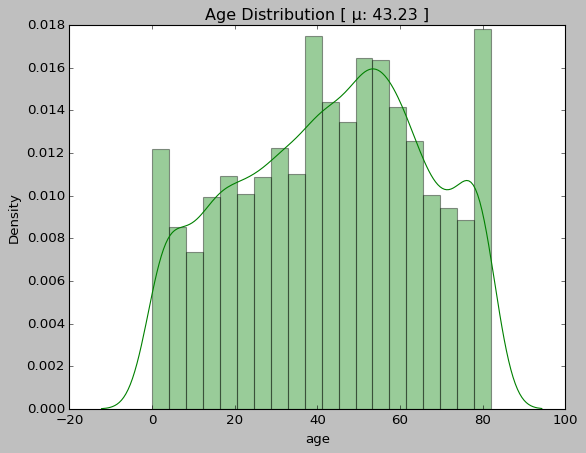

In [7]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_df["age"], color="g")
plt.title(f"Age Distribution [ \u03BC: {data_df['age'].mean():.2f} ]")
plt.show()

([<matplotlib.patches.Wedge at 0x7f5fa47bc190>,
 [Text(-0.02772429096401782, 1.0996505643569428, 'urban'),
  Text(0.03024479336807372, -1.1996187946485846, 'rural')])

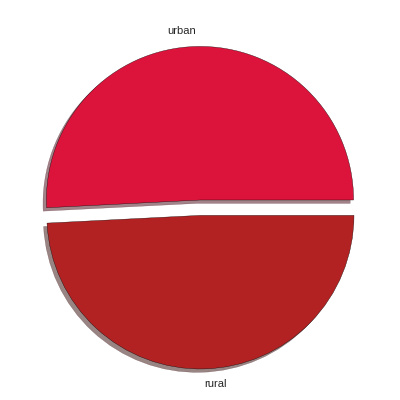

In [8]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=data_df["Residence_type"].value_counts(), 
        colors=["crimson","firebrick"], 
        labels=["urban","rural"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

In [9]:
#to obtain all numeric columns
numeric = [col for col in data_df.columns if data_df[col].dtypes!='object']
print('numeric columns are:',numeric)
#to obtain all categorical columns
categorical = [col for col in data_df.columns if data_df[col].dtypes=='object']
print('categorical columns are:',categorical)

numeric columns are: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categorical columns are: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [10]:
cat_df =data_df[categorical]
numeric_df= data_df[numeric]

In [11]:
cat_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [12]:
numeric_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_df['gender'] = le.fit_transform(cat_df['gender'])
cat_df['ever_married'] = le.fit_transform(cat_df['ever_married'])
cat_df['work_type'] = le.fit_transform(cat_df['work_type'])
cat_df['Residence_type'] = le.fit_transform(cat_df['Residence_type'])
cat_df['smoking_status'] = le.fit_transform(cat_df['smoking_status'])

cat_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
5,1,1,2,1,1
6,1,1,2,0,2
7,0,0,2,1,2
8,0,1,2,0,0
9,0,1,2,1,0


In [14]:
import pandas as pd
df = pd.concat([cat_df,numeric_df],axis=1)

In [15]:
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6,1
1,0,1,3,0,2,51676,61.0,0,0,202.21,NaN,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0,1


In [16]:
ds= df.iloc[:,:-1]
y= df.iloc[:,[-1]]

In [17]:
ds

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6
1,0,1,3,0,2,51676,61.0,0,0,202.21,NaN
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,18234,80.0,1,0,83.75,NaN
5106,0,1,3,1,2,44873,81.0,0,0,125.20,40.0
5107,0,1,3,0,2,19723,35.0,0,0,82.99,30.6
5108,1,1,2,0,1,37544,51.0,0,0,166.29,25.6


In [18]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [19]:
ss = StandardScaler()
x = ss.fit_transform(ds.iloc[:,5:])

In [20]:
X_train,X_test, y_train,y_test = train_test_split(
                                                  x,
                                                  y,
                                                  test_size = 0.25
                                                  )
X_train.shape  
X_test.shape  

(3832, 6)

(1278, 6)

In [21]:
no_of_samples_tr = X_train.shape[0]
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr    

In [22]:
no_of_samples_test = X_test.shape[0]          
input_features = X_test.shape[1]             
channels = 1
batch_size_test = no_of_samples_test

In [23]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [24]:
train.shape  
test.shape 

(3832, 6, 1)

(1278, 6, 1)

In [25]:
inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])  
                        )

In [26]:
import tensorflow as tf
from tensorflow.keras import layers
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [27]:
x_left = layers.Conv1D(
                       filters = 128,
                       kernel_size=2,
                       activation='relu'
                       )(x_left)

In [28]:
x_rt = layers.Conv1D(
                      filters = 32,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

In [29]:
x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=2,
                      activation='relu'
                    )(x_rt)

In [30]:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [31]:
x = layers.Flatten()(x)

In [32]:
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [33]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [34]:
model = Model(inputs = [inputs], outputs = [out])

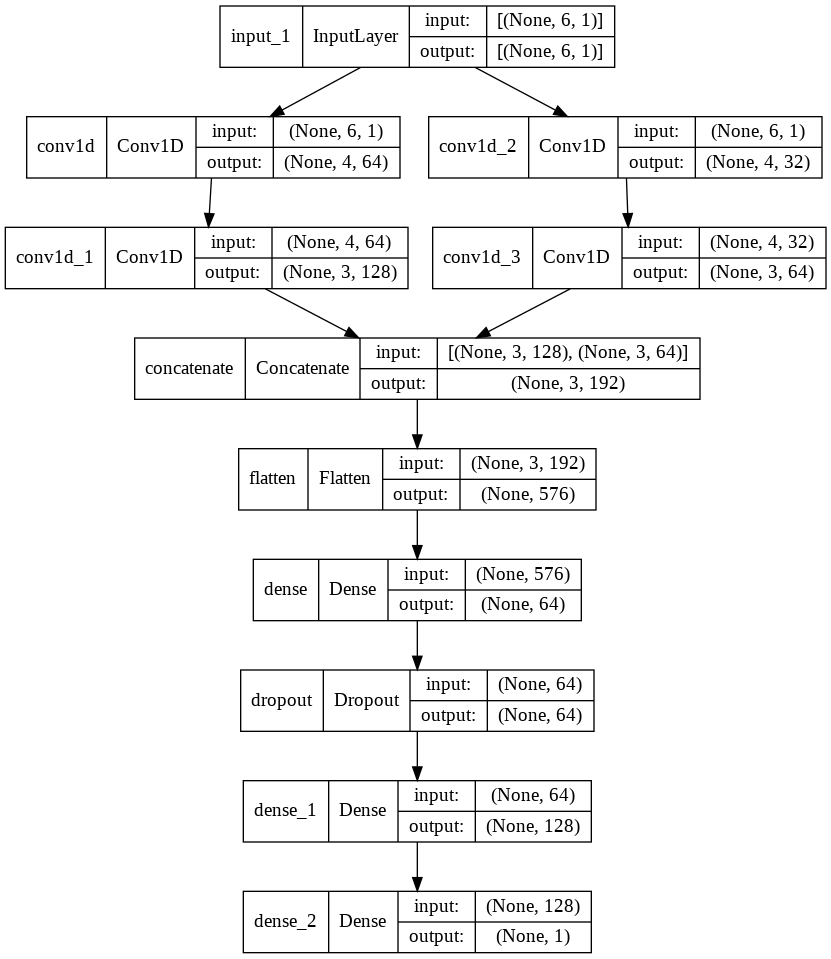

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4, 64)        256         ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 4, 32)        128         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 3, 128)       16512       ['conv1d[0][0]']                 
                                                                                              

In [37]:
model.compile(
               optimizer = 'adam',
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy']
               )

In [38]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)

In [40]:
history = model.fit(
                    train,
                    y_train,
                    epochs = 175,
                    verbose = 1
                    )

Epoch 1/175
120/120 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9489
Epoch 2/175
120/120 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9489
Epoch 3/175
120/120 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.9489
Epoch 4/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 5/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 6/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 7/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 8/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 9/175
120/120 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.9489
Epoch 10/175
120/120 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9489
Epoch 11/175
120/12

In [41]:
model.evaluate(test,y_test)

40/40 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9585


[nan, 0.9585289359092712]